# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import MobileNetV2

- Shape gambar (panjang,lebar)
- Dimensi
- Hasil Augmentasi
- Distribusi Data berdasarkan setiap kelas

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Dataset

https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data

# Data Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir ~/.kaggle  #membuat direktori di dalam root

# !cp 'kaggle.json' ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle

!ls ~/.kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
kaggle.json


In [5]:
!kaggle datasets download -d datamunge/sign-language-mnist

 96% 60.0M/62.6M [00:00<00:00, 90.6MB/s]
100% 62.6M/62.6M [00:00<00:00, 85.9MB/s]


In [6]:
!unzip -q /content/sign-language-mnist.zip

In [7]:
train = pd.read_csv(os.path.join(os.getcwd(),'sign_mnist_train.csv'))
test = pd.read_csv(os.path.join(os.getcwd(),'sign_mnist_test.csv'))

data = pd.concat([train,test])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [11]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# Exploration Data Analysis

In [12]:
train_img = train.drop(columns=['label'])
test_img = test.drop(columns=['label'])

### Melihat Distribusi Data

In [13]:
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of
    plt.title(f"{label} Distribution", size=10)
    plt.show()

<ipython-input-13-1236a93de0e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=dataframe, palette='Set2')


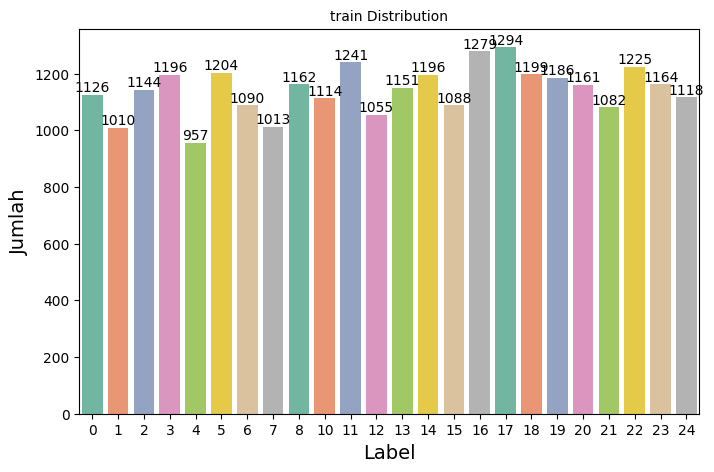

In [14]:
visualize_data(train, 'train')

Label pada data train seimbang

<ipython-input-13-1236a93de0e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=dataframe, palette='Set2')


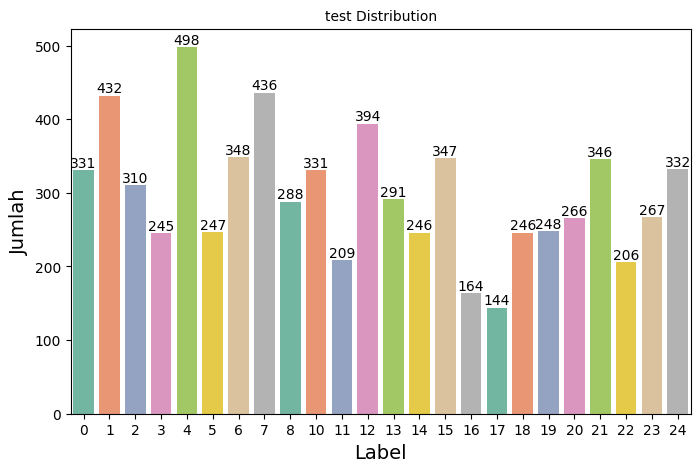

In [15]:
visualize_data(test, 'test')

Label pada data test seimbang

### Melihat Dimensi Data

In [16]:
train.shape

(27455, 785)

([<matplotlib.patches.Wedge at 0x7ff0fc1be6b0>,
 [Text(-1.095808237577023, 0.09593907680574597, ''),
  Text(1.0958082347700022, -0.09593910886729962, '')])

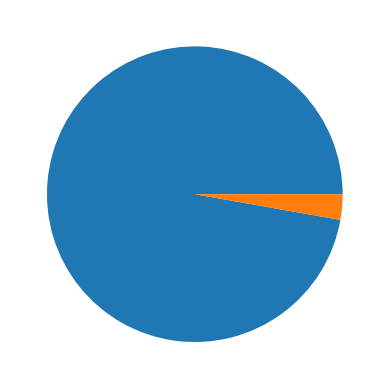

In [17]:
plt.pie(train.shape)

In [18]:
test.shape

(7172, 785)

([<matplotlib.patches.Wedge at 0x7ff0fc12cc10>,
 [Text(-1.0475888323970644, 0.3354961076330925, ''),
  Text(1.047588816691357, -0.3354961566742648, '')])

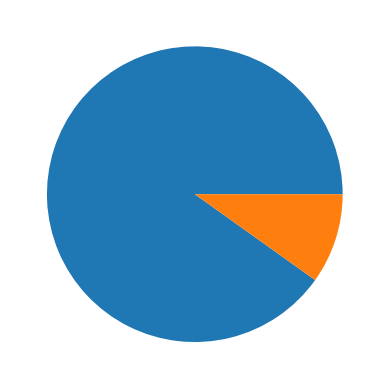

In [19]:
plt.pie(test.shape)

Dimensi data ada dua dengan baris lebih banyak dibanding kolom dan data train memiliki baris lebih banyak dibanding data test.

### Melihat Panjang dan Lebar dari Gambar

In [20]:
train_img.shape[1]

784

In [21]:
test_img.shape[1]

784

Ukuran Train dan Test dalam 1D adalah 784

### Melihat Panjang dan Lebar untuk persegi dari

In [22]:
[i for i in range(train_img.shape[1]) if i*i == train_img.shape[1]][0]

28

In [23]:
[i for i in range(test_img.shape[1]) if i*i == test_img.shape[1]][0]

28

Panjang Dan Lebar pada train dan test adalah 28 x 28. Maka train_img dan test_img akan di ubah shape kolomnya menjadi 28 x 28

In [24]:
# train.drop(columns=['label']).values.reshape(*[train.drop(columns=['label']).values.shape[i] if train.drop(columns=['label']).values.shape[i]>1000 else train.drop(columns=['label']).values.shape[i if i < len(train.drop(columns=['label']).shape) else [i for i in range(train.drop(columns=['label']).values.shape[len(train.drop(columns=['label']).values.shape)-1]) if i%2==0 and i!=0 and i*i==784][len([i for i in range(train.drop(columns=['label']).values.shape[len(train.drop(columns=['label']).values.shape)-1]) if i%2==0 and i!=0 and i*i==784])-1] for i in range(1)])

In [25]:
# [i for i in range(train.drop(columns=['label']).values.shape[len(train.drop(columns=['label']).values.shape)-1]) if i%2==0 and i!=0 and i*i==784][len([i for i in range(train.drop(columns=['label']).values.shape[len(train.drop(columns=['label']).values.shape)-1]) if i%2==0 and i!=0 and i*i==784])-1]

### Melihat Augmentasi Data

In [26]:
# Create Plot for Augmentation Image
def aug(desk):
  # Processing Data
  dec = {i:j for i,j in enumerate([i for i in string.ascii_lowercase])} # Decode
  enc = {j:i for i,j in enumerate([i for i in string.ascii_lowercase])} # Encode
  desk = desk.copy()
  desk['label'] = desk['label'].apply(lambda x: dec[x])
  image = desk.label.unique().tolist()

  fig,axe=plt.subplots(4,4,figsize=(10,10))
  fig.suptitle('Image Augmentation')
  count=0

  for i in range(4):
    for j in range(4):
      dummy = desk[desk['label']==image[count]].drop(columns='label')
      label = desk[desk['label']==image[count]]['label'].apply(lambda x: enc[x]).values[0]
      axe[i%4,j].imshow(dummy.values[i+j].reshape(28,28),cmap='gray')
      axe[i%4,j].set_title(f'label: {label}  letter: {image[count]}')
      count+=1

  plt.tight_layout()
  plt.show()

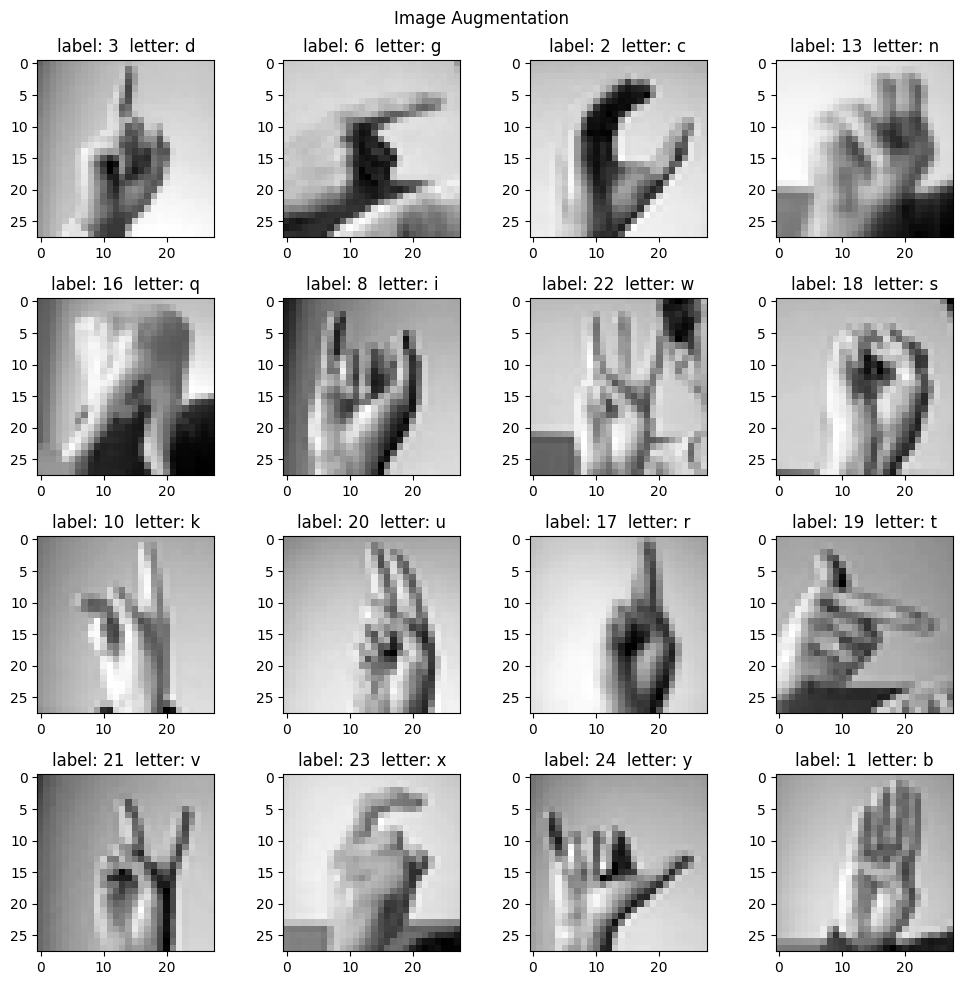

In [27]:
aug(data)

# Data Splitting

In [28]:
from sklearn.model_selection import train_test_split
X, y = data.drop(columns=['label']).values, data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=21,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=21,stratify=y_train)

In [29]:
y_train.shape

(28047,)

Karena Convolutional 2D membutuhkan input yang memiliki 4 Dimensi, maka data feature harus di reshape menjadi 4 dimensi dengan 3 channel.

Data harus bertipe array untuk ditraining dengan Deep Learning.

# Data Preprocessing

In [30]:
def reshape_to_4d(arr):
  dim = arr.ndim
  wh = int(X_train.shape[-1]**(1/X_train.ndim))
  return arr.reshape(-1,wh,wh,1)

In [31]:
X_train3D = tf.image.resize(reshape_to_4d(X_train),size=(32,32))
X_val3D = tf.image.resize(reshape_to_4d(X_val),size=(32,32))

Image telah diresize dari 28\*28 \(karena hasil fungsinya adalah 28\*28 karena akar dari 784 adalah 28\) menjadi 32\*32.

Karena gambarnya masih dalam format grayscale\(karena channelnya hanya 1. Channel dijadikan 1 untuk mempertahankan baris data karena jika di resize secara paksa, maka data akan mengorbankan baris untuk men resize menjadi 3 channel \) maka akan di konversikan menjadi rgb supaya bisa dimasukan ke semua model.

Alasan utama melakukan ini supaya data yang ingin di train compatible untuk semua transfer learning model karena ukuran minimal untuk image adalah 32 x 32 dengan 3 channel (?,32,32,3)

### Melihat Perbandingan Augmentasi Data

#### Train

In [32]:
# See label on index 0
y_train[0]

7

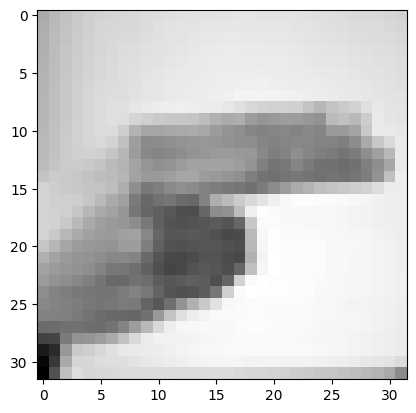

In [33]:
# Show label 13 images
plt.imshow(X_train3D[0],cmap='gray')

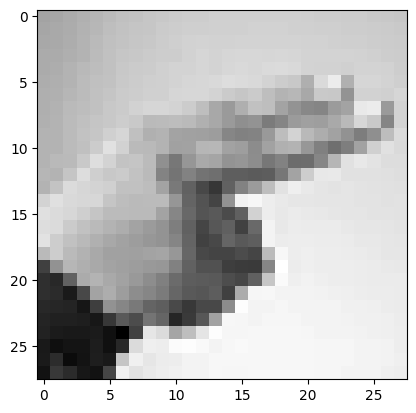

In [34]:
plt.imshow(train[train['label']==y_train[0]].iloc[0,1:].values.reshape(28,28),cmap='gray')

Dalam Data Train, Image setelah diresize dengan format channel grayscale tetap sama dalam hal augmentasi gambar dan banyaknya gambar dalam train dan val.

#### Validation

In [35]:
# See label on index 0
y_val[0]

13

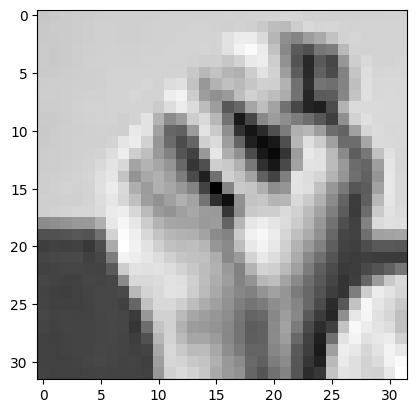

In [36]:
# Show label 13 images
plt.imshow(X_val3D[0],cmap='gray',interpolation='nearest')

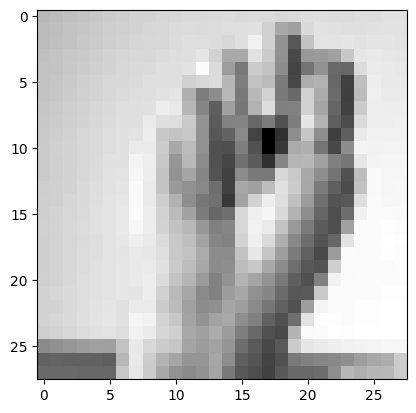

In [37]:
# See if image are same as after reshape
plt.imshow(train[train['label']==y_val[0]].iloc[0,1:].values.reshape(28,28),cmap='gray')

In [38]:
[X_train3D.shape[0] == y_train.shape[0],X_val3D.shape[0] == y_val.shape[0]]

[True, True]

Dalam data Validation, Image setelah diresize dengan format channel grayscale tetap sama dalam hal augmentasi gambar dan banyaknya gambar dalam train dan val

### Mengkonversikan Grayscale Image menjadi RGB

In [39]:
# Convert Grayscale to RGB
X_trainRGB = np.array(tf.image.grayscale_to_rgb(X_train3D))
X_valRGB = np.array(tf.image.grayscale_to_rgb(X_val3D))

In [40]:
[X_trainRGB.shape[0] == y_train.shape[0],X_valRGB.shape[0] == y_val.shape[0]]

[True, True]

In [85]:
'pandas' in str(type(X_test))

False

In [91]:
def RGB(dataset):
  if hasattr(dataset,'values'):
    dataset = dataset.values
  dim = dataset.ndim
  wh = int(X_train.shape[-1]**(1/X_train.ndim))
  resh = dataset.reshape(-1,wh,wh,1)
  resize = tf.image.resize(resh,size=(32,32))
  rgb = np.array(tf.image.grayscale_to_rgb(resize))

  return rgb


# Model Definition

In [41]:
# Callback Definition
callback = [
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('seq_model.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ],
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('func_model.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ],
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('trans_model.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ]
]

In [42]:
def seq(input_shape,output_len):
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)

    model = Sequential()
    model.add(layers.Conv2D(filters=16,kernel_size=(1,1),input_shape=input_shape,activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(1,1),padding='same'))
    model.add(layers.Conv2D(filters=32,kernel_size=(2,2),input_shape=input_shape,activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3),padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(255,activation='relu'))
    model.add(layers.Dense(output_len,activation='softmax'))
    model.compile(optimizer='adamax',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

def multi(input_shape, output_len):
    # Clearing the previous session and setting a random seed
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)


    # Input layer
    input_layer = layers.Input(input_shape)

    # Branch 1
    x = layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu')(input_layer)
    x = layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)

    # Branch 2
    y = layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu')(input_layer)
    y = layers.MaxPool2D(pool_size=(2, 2), padding='same')(y)

    # Concatenate branches
    merged = layers.concatenate([x, y])

    # Dense layer after concatenation
    merged = layers.Dense(units=64, activation='relu')(merged)

    # Branch 3
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(merged)
    x = layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)

    # Branch 4
    y = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(merged)
    y = layers.MaxPool2D(pool_size=(2, 2), padding='same')(y)

    # Branch 5
    z = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(merged)
    z = layers.MaxPool2D(pool_size=(2, 2), padding='same')(z)

    # Concatenate branches using functional API
    merged = layers.concatenate([x, y, z])

    # Dense layer after concatenation
    merged = layers.Dense(units=256, activation='relu')(merged)

    # Flatten layer
    merged = layers.Flatten()(merged)

    # Dense layers for classification
    merged = layers.Dense(units=256, activation='relu')(merged)
    output_layer = layers.Dense(units=output_len, activation='softmax')(merged)

    # Creating and compiling the model
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

def transfer(input_shape, output_shape):
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)

    # Remove input_shape argument in MobileNetV2 to allow for variable input shapes
    trans = MobileNetV2(weights='imagenet', include_top=False,input_shape=input_shape)

    test = Sequential()
    test.add(trans)
    test.add(layers.Flatten())
    test.add(layers.Dense(128, activation='relu'))

    # Adjust the number of units in the output layer to match output_shape
    test.add(layers.Dense(output_shape, activation='softmax'))

    test.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    test.summary()
    return test

### Membuat Sequential Model

In [43]:
seq_model = seq(X_trainRGB.shape[1:],len(set(y_train))+1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0

Model ini adalah model neural network berjenis sequential yang terdiri dari beberapa layer. Berikut adalah beberapa insight terkait dengan struktur model ini:

1. **Convolutional Layers:**
   - Terdapat tiga layer konvolusi (`Conv2D`), masing-masing dengan jumlah filter yang berbeda (16, 32, dan 64).
   - Filter pertama memiliki ukuran 3x3, sedangkan filter kedua dan ketiga memiliki ukuran yang berbeda.
   - Setiap layer konvolusi diikuti oleh fungsi aktivasi yang tidak ditampilkan di sini.

2. **Max Pooling Layers:**
   - Terdapat tiga layer max pooling (`MaxPooling2D`) yang mengikuti setiap layer konvolusi.
   - Max pooling digunakan untuk mengurangi resolusi spasial gambar dan mengurangi jumlah parameter dengan mempertahankan fitur-fitur utama.

3. **Flatten Layer:**
   - Setelah operasi konvolusi dan max pooling, terdapat layer flatten yang mengubah tensor multi-dimensional menjadi vektor satu dimensi (1600 elemen).

4. **Dense Layers:**
   - Terdapat dua layer dense setelah layer flatten.
   - Layer dense pertama memiliki 255 neuron, diikuti oleh fungsi aktivasi yang tidak ditampilkan.
   - Layer dense kedua memiliki 25 neuron, juga diikuti oleh fungsi aktivasi yang tidak ditampilkan.

5. **Parameter:**
   - Jumlah parameter dari masing-masing layer ditampilkan sebagai 'Param #'.
   - Jumlah parameter pada layer konvolusi dipengaruhi oleh ukuran filter, jumlah filter, dan jumlah saluran input dan output.
   - Jumlah parameter pada layer dense dipengaruhi oleh jumlah neuron pada layer sebelumnya dan pada layer tersebut sendiri.

6. **Input Shape:**
   - Input yang diharapkan oleh model ini memiliki bentuk (32, 32, 3), yang sesuai dengan gambar berukuran 32x32 piksel dengan tiga saluran warna (RGB).

7. **Output Shape:**
   - Output terakhir dari model ini memiliki bentuk (None, 25), dengan 25 neuron pada layer output terakhir.

8. **Kesimpulan:**
   - Model ini secara umum cocok untuk tugas klasifikasi di mana inputnya adalah gambar dengan ukuran 32x32 piksel dan ada 25 kelas yang mungkin (sesuai dengan jumlah neuron pada layer output terakhir).
   - Struktur model ini mencerminkan pendekatan umum dalam penggunaan layer konvolusi untuk mengekstraksi fitur dari data gambar sebelum melakukan klasifikasi menggunakan layer dense.

### Membuat Functional Model

In [44]:
func_model = multi(X_trainRGB.shape[1:],len(set(y_train))+1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 31, 31, 32)           416       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 31, 31, 32)           416       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)           0         ['conv2d[0][0]']              
 D)                                                                                           

1. **Input Layer:**
   - Input layer (`input_1`) memiliki bentuk input (None, 32, 32, 3), sesuai dengan gambar berukuran 32x32 piksel dengan tiga saluran warna (RGB).

2. **Convolutional Layers and Max Pooling:**
   - Terdapat dua lapisan konvolusi (`Conv2D`) yang diikuti oleh operasi max pooling (`MaxPooling2D`). Lapisan ini masing-masing memiliki 32 filter dengan ukuran kernel 3x3.
   - Max pooling digunakan untuk mengurangi dimensi spasial dari hasil konvolusi.

3. **Concatenation:**
   - Hasil dari dua operasi max pooling digabungkan (`concatenate`) menjadi satu tensor dengan dimensi yang lebih tinggi (16, 16, 64).
   - Gabungan tersebut kemudian digunakan sebagai input untuk lapisan dense.

4. **Dense Layers:**
   - Terdapat tiga lapisan dense. Yang pertama memiliki 64 neuron dengan fungsi aktivasi yang tidak ditampilkan.
   - Lapisan dense kedua memiliki 256 neuron dengan fungsi aktivasi yang tidak ditampilkan.
   - Lapisan dense terakhir memiliki 25 neuron, sesuai dengan jumlah kelas output.

5. **Parameter:**
   - Jumlah parameter pada lapisan konvolusi dipengaruhi oleh ukuran kernel, jumlah filter, dan jumlah saluran input dan output.
   - Jumlah parameter pada lapisan dense dipengaruhi oleh jumlah neuron pada lapisan sebelumnya dan pada lapisan tersebut sendiri.

6. **Flatten Layer:**
   - Terdapat satu lapisan flatten yang mengubah tensor multi-dimensional menjadi vektor satu dimensi (12544 elemen) sebelum masuk ke lapisan dense.

7. **Kesimpulan:**
   - Model ini dirancang untuk tugas klasifikasi dengan input berupa gambar. Konsep penggabungan hasil max pooling dari beberapa lapisan konvolusi dapat membantu model mengekstraksi fitur-fitur yang lebih kompleks.
   - Struktur model ini lebih kompleks dibandingkan dengan model sebelumnya, dengan adanya penggabungan hasil max pooling dari beberapa jalur konvolusi sebelum memasuki lapisan dense.

### Membuat Transfer Learning Model

In [45]:
trans_model = transfer(X_trainRGB.shape[1:],len(set(y_train))+1)

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 2425177 (9.25 MB)
Trainable params: 2391065 (9.12 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


1. **Pretrained MobileNetV2:**
   - Model ini menggunakan arsitektur MobileNetV2, yang dikenal sebagai model ringan yang efisien untuk tugas klasifikasi gambar.
   - Pretrained weights dari model MobileNetV2 dengan input shape (224, 224, 3) diunduh dari sumber yang disediakan oleh TensorFlow.

2. **Input Shape:**
   - Input shape yang diharapkan oleh model ini adalah (224, 224, 3). Jika input shape yang diberikan berbeda, model memberikan peringatan bahwa weights untuk input shape (224, 224, 3) akan diambil sebagai default.

3. **Flatten Layer:**
   - Setelah lapisan MobileNetV2, terdapat lapisan flatten yang mengubah output dari MobileNetV2 (tensor 4D) menjadi vektor satu dimensi (1280 elemen).

4. **Dense Layers:**
   - Terdapat dua lapisan dense setelah lapisan flatten. Lapisan pertama memiliki 128 neuron dan diikuti oleh fungsi aktivasi yang tidak ditampilkan.
   - Lapisan dense kedua memiliki 25 neuron, sesuai dengan jumlah kelas output.

5. **Parameter:**
   - Jumlah parameter model ini ditampilkan. Total parameter mencakup parameter yang dapat di-train (trainable) dan parameter yang tidak dapat di-train (non-trainable).
   - MobileNetV2 memiliki parameter yang tidak dapat di-train (non-trainable) karena menggunakan weights pretrained.

6. **Trainable Params vs Non-trainable Params:**
   - Jumlah trainable parameters adalah 2,391,065 (sekitar 9.12 MB), yang dapat di-update selama proses pelatihan.
   - Jumlah non-trainable parameters adalah 34,112 (sekitar 133.25 KB), yang berasal dari weights MobileNetV2 yang tidak diubah selama pelatihan.

7. **Kesimpulan:**
   - Model ini memanfaatkan keunggulan MobileNetV2 dalam hal kecepatan dan efisiensi untuk tugas klasifikasi gambar.
   - Pretrained weights membantu model memiliki pemahaman awal terhadap fitur-fitur yang relevan dari dataset ImageNet, yang dapat meningkatkan kinerja model pada tugas-tugas terkait.

# Model Plot

### Sequential Model

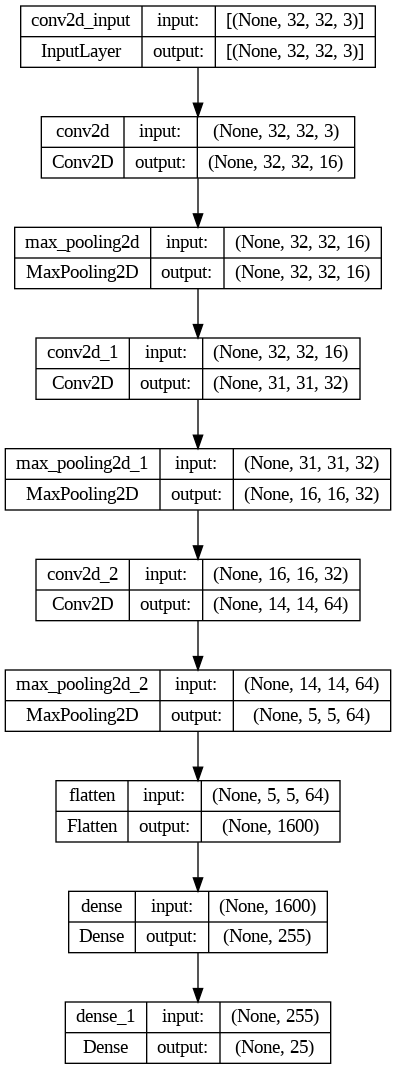

In [46]:
# Show model plot
keras.utils.plot_model(seq_model,show_shapes=True)

### Functional Model

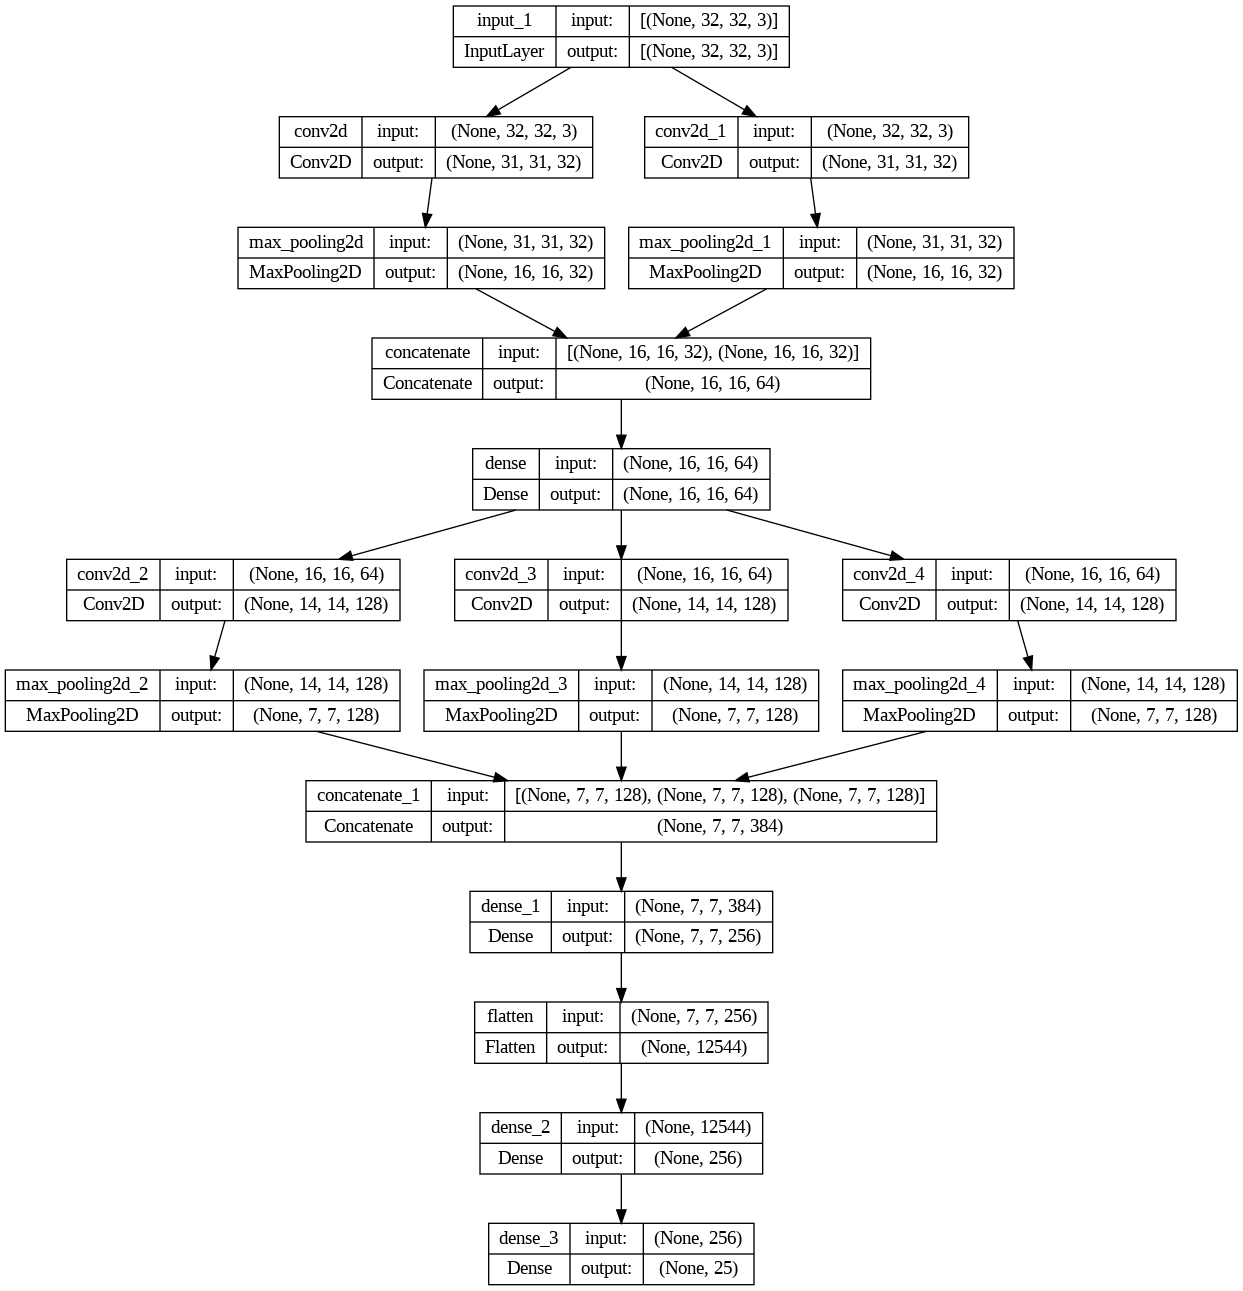

In [47]:
# Show model plot
keras.utils.plot_model(func_model,show_shapes=True)

### Transfer Learning Model

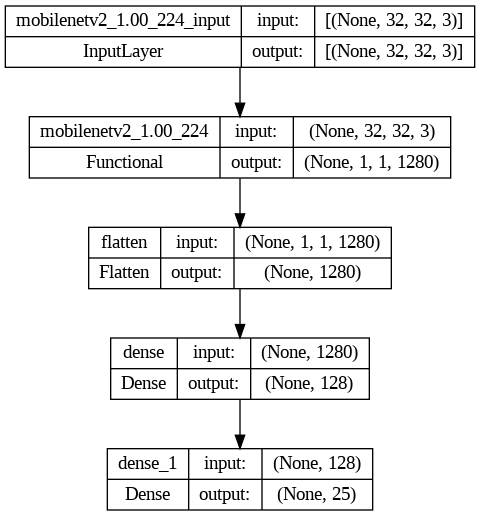

In [48]:
# Show model plot
keras.utils.plot_model(trans_model,show_shapes=True)

# Model Training and Evaluation

### Sequential Model

In [49]:
history = seq_model.fit(X_trainRGB,y_train,epochs=20,validation_data=(X_valRGB,y_val),callbacks=callback[0])

Epoch 1/20
877/877 [==============================] - 10s 6ms/step - loss: 1.0161 - accuracy: 0.7931 - val_loss: 0.0622 - val_accuracy: 0.9910
Epoch 2/20
 19/877 [..............................] - ETA: 4s - loss: 0.0513 - accuracy: 0.9951

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


877/877 [==============================] - 4s 4ms/step - loss: 0.0223 - accuracy: 0.9981 - val_loss: 0.0095 - val_accuracy: 0.9994
Epoch 3/20
877/877 [==============================] - 4s 4ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9997
Epoch 4/20
877/877 [==============================] - 4s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.6670e-04 - val_accuracy: 1.0000
Epoch 5/20
877/877 [==============================] - 5s 5ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 6/20
877/877 [==============================] - 4s 4ms/step - loss: 4.1491e-04 - accuracy: 1.0000 - val_loss: 2.9644e-04 - val_accuracy: 1.0000
Epoch 7/20
877/877 [==============================] - 4s 5ms/step - loss: 1.4060e-04 - accuracy: 1.0000 - val_loss: 1.6885e-04 - val_accuracy: 1.0000
Epoch 8/20
877/877 [==============================] - 6s 7ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0536 - val_accuracy: 0.98

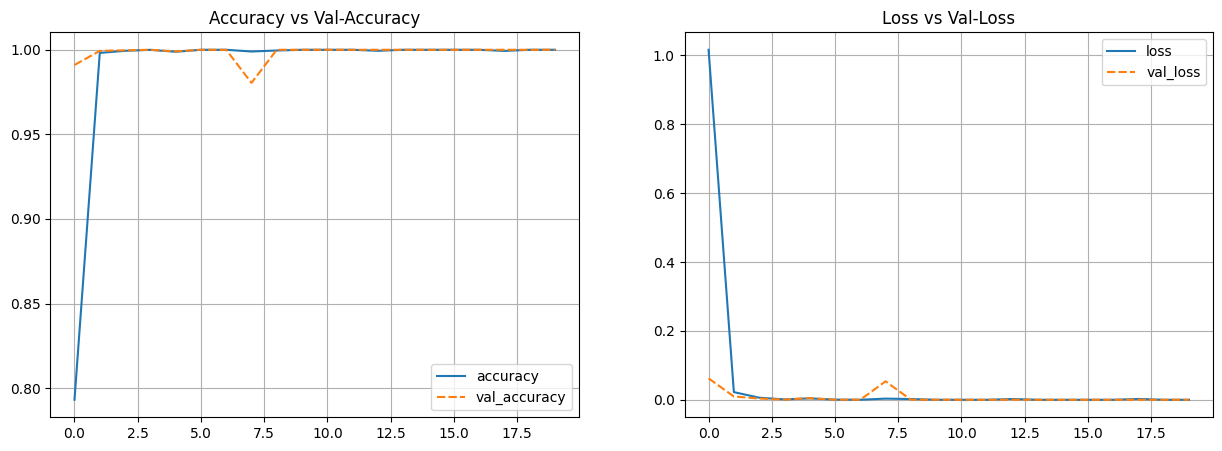

In [50]:
# Plot Training Results

history_model = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Model Sequential adalah overfit karena Train Accuracy meningkat sedangkan Val accuracy dimulai dari paling atas dan Train Loss berkurang sedangkan Val accuracy dimulai dari paling bawah mengakibatkan perbedaan yang besar antara data train dan data validasi.

### Functional Model

In [51]:
history = func_model.fit(X_trainRGB,y_train,epochs=20,validation_data=(X_valRGB,y_val),callbacks=callback[1])

Epoch 1/20
877/877 [==============================] - 12s 9ms/step - loss: 1.4215 - accuracy: 0.8543 - val_loss: 0.0074 - val_accuracy: 0.9994
Epoch 2/20
  8/877 [..............................] - ETA: 6s - loss: 0.0071 - accuracy: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


877/877 [==============================] - 8s 9ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/20
877/877 [==============================] - 7s 8ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/20
877/877 [==============================] - 8s 9ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 3.6232e-04 - val_accuracy: 1.0000
Epoch 5/20
877/877 [==============================] - 7s 8ms/step - loss: 1.3388e-04 - accuracy: 1.0000 - val_loss: 6.7174e-05 - val_accuracy: 1.0000
Epoch 6/20
877/877 [==============================] - 8s 9ms/step - loss: 4.0026e-05 - accuracy: 1.0000 - val_loss: 3.9566e-05 - val_accuracy: 1.0000
Epoch 7/20
877/877 [==============================] - 7s 8ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0013 - val_accuracy: 0.9990
Epoch 8/20
877/877 [==============================] - 8s 9ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 4.7376e-05 - val_accuracy: 

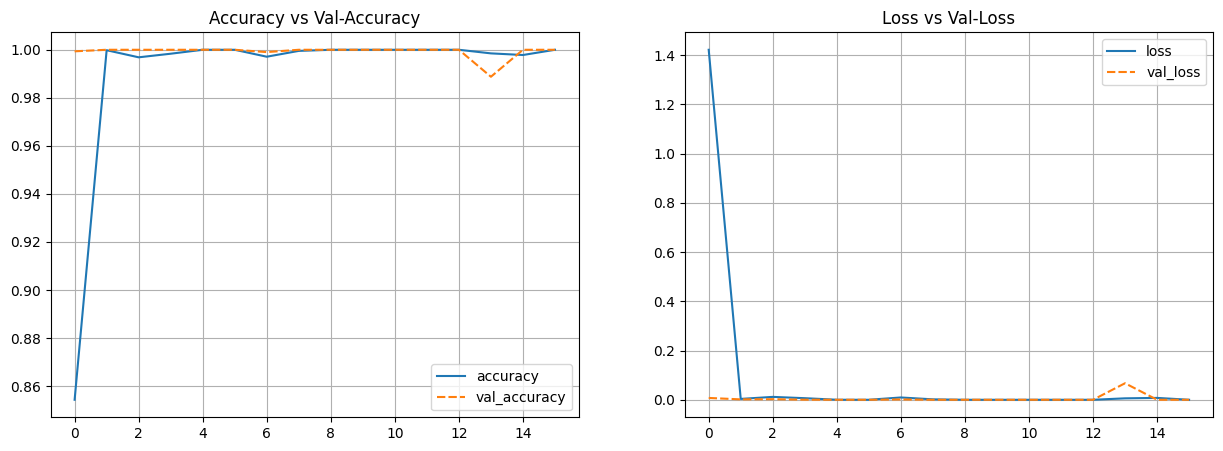

In [52]:
# Plot Training Results

history_model = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Model Functional adalah overfit karena Val Accuracy dimulai dari atas dan Val Loss dimulai dari paling bawah, sedangkan train scorenya dimulai dari atas, mengakibatkan perbedaan yang besar dari data train dan data val.

### Transfer Learning Model

In [53]:
history = trans_model.fit(X_trainRGB,y_train,epochs=20,validation_data=(X_valRGB,y_val),callbacks=callback[2])

Epoch 1/20
877/877 [==============================] - ETA: 0s - loss: 0.7882 - accuracy: 0.7619

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


877/877 [==============================] - 49s 30ms/step - loss: 0.7882 - accuracy: 0.7619 - val_loss: 3.4373 - val_accuracy: 0.1354
Epoch 2/20
877/877 [==============================] - 23s 26ms/step - loss: 0.1387 - accuracy: 0.9556 - val_loss: 1.5146 - val_accuracy: 0.5563
Epoch 3/20
877/877 [==============================] - 24s 27ms/step - loss: 0.0859 - accuracy: 0.9754 - val_loss: 0.5623 - val_accuracy: 0.8893
Epoch 4/20
877/877 [==============================] - 23s 27ms/step - loss: 0.0596 - accuracy: 0.9832 - val_loss: 0.1253 - val_accuracy: 0.9782
Epoch 5/20
877/877 [==============================] - 23s 26ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 0.0625 - val_accuracy: 0.9885
Epoch 6/20
877/877 [==============================] - 24s 28ms/step - loss: 0.0340 - accuracy: 0.9901 - val_loss: 0.0184 - val_accuracy: 0.9958
Epoch 7/20
877/877 [==============================] - 23s 26ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.0845 - val_accuracy: 0.9737
Epo

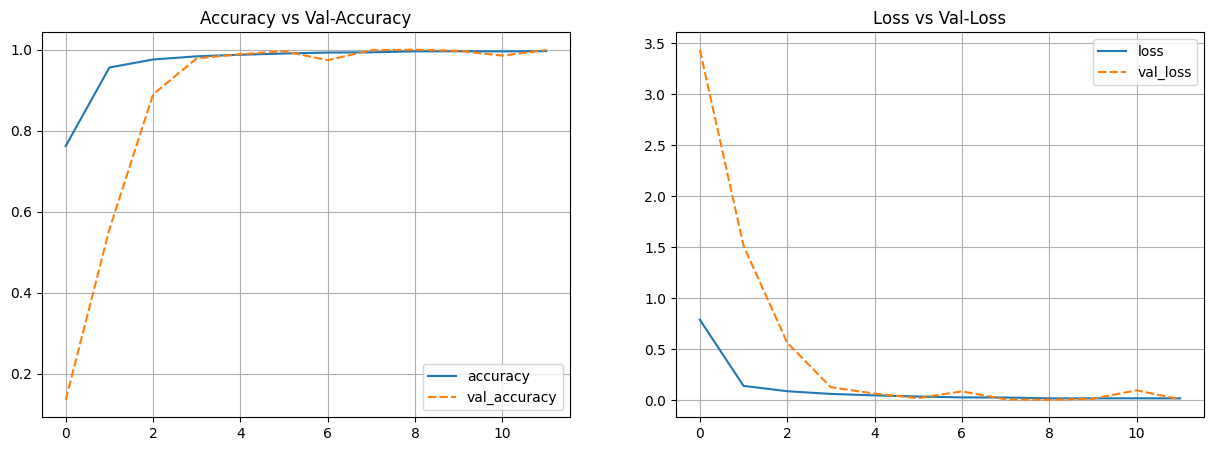

In [54]:
# Plot Training Results

history_model = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Model Transfer Learning adalah overfit karena Val Accuracy dimulai dari atas dan Val Loss dimulai dari paling bawah, sedangkan train scorenya dimulai dari atas, mengakibatkan perbedaan yang besar dari data train dan data val.

# Model Improvement

Model Improvement akan menggunakan Dropout di setiap layer convolutional untuk sequential dan functional model.

Untuk Transfer Learning, akan ditambahkan Dropout pada penyatuan model

## Model Definition

In [55]:
# Callback Definition
callback = [
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('seq_modelv2.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ],
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('func_modelv2.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ],
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('trans_modelv2.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ]
]

In [60]:
def seq(input_shape,output_len):
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)

    model = Sequential()
    # Conv Layer 1
    model.add(layers.Conv2D(filters=16,kernel_size=(1,1),input_shape=input_shape,activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(1,1),padding='same'))
    model.add(layers.Dropout(0.2))

    # Conv Layer 2
    model.add(layers.Conv2D(filters=32,kernel_size=(2,2),input_shape=input_shape,activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2),padding='same'))
    model.add(layers.Dropout(0.2))

    # Conv Layer 3
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3),padding='same'))
    model.add(layers.Dropout(0.2))

    # Unite the Layer
    model.add(layers.Flatten())

    #Create Neural Network with 255 Neural Net
    model.add(layers.Dense(255,activation='relu'))
    model.add(layers.Dropout(0.2))

    #Create Activation Function
    model.add(layers.Dense(output_len,activation='softmax'))
    model.compile(optimizer='adamax',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

def multi(input_shape, output_len):
    # Clearing the previous session and setting a random seed
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)


    # Input layer
    input_layer = layers.Input(input_shape)

    # Branch 1
    x = layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu')(input_layer)
    x = layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # Branch 2
    y = layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu')(input_layer)
    y = layers.MaxPool2D(pool_size=(2, 2), padding='same')(y)
    y = layers.Dropout(0.2)(y)

    # Concatenate branches
    merged = layers.concatenate([x, y])

    # Dense layer after concatenation
    merged = layers.Dense(units=64, activation='relu')(merged)

    # Branch 3
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(merged)
    x = layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # Branch 4
    y = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(merged)
    y = layers.MaxPool2D(pool_size=(2, 2), padding='same')(y)
    y = layers.Dropout(0.2)(y)

    # Branch 5
    z = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(merged)
    z = layers.MaxPool2D(pool_size=(2, 2), padding='same')(z)
    z = layers.Dropout(0.2)(z)

    # Concatenate branches using functional API
    merged = layers.concatenate([x, y, z])

    # Dense layer after concatenation
    merged = layers.Dense(units=256, activation='relu')(merged)

    # Flatten layer
    merged = layers.Flatten()(merged)

    # Dense layers for classification
    merged = layers.Dense(units=256, activation='relu')(merged)
    merged = layers.Dropout(0.2)(merged)
    output_layer = layers.Dense(units=output_len, activation='softmax')(merged)

    # Creating and compiling the model
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

def transfer(input_shape, output_shape):
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)

    # Remove input_shape argument in MobileNetV2 to allow for variable input shapes
    trans = MobileNetV2(weights='imagenet', include_top=False,input_shape=input_shape)

    test = Sequential()
    test.add(trans)
    test.add(layers.Flatten())
    test.add(layers.Dense(128, activation='relu'))
    test.add(layers.Dropout(0.2))
    # Adjust the number of units in the output layer to match output_shape
    test.add(layers.Dense(output_shape, activation='softmax'))

    test.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    test.summary()
    return test

### Sequential

In [61]:
seq_model = seq(X_trainRGB.shape[1:],len(set(y_train))+1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### Functional

In [62]:
func_model = multi(X_trainRGB.shape[1:],len(set(y_train))+1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 31, 31, 32)           416       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 31, 31, 32)           416       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)           0         ['conv2d[0][0]']              
 D)                                                                                           

### Transfer Learning

In [63]:
trans_model = transfer(X_trainRGB.shape[1:],len(set(y_train))+1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 2425177 (9.25 MB)
Trainable params: 2391065 (9.12 MB)
Non-trainable params: 34112 (133.25 KB)
______________

## Model Plot

### Sequential

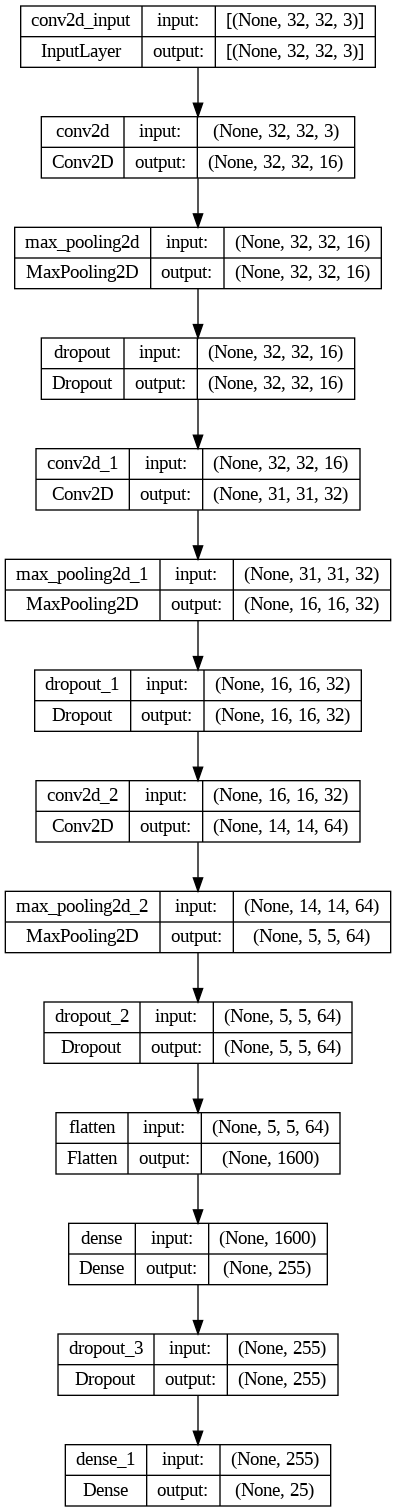

In [64]:
# Show model plot
keras.utils.plot_model(seq_model,show_shapes=True)

### Functional

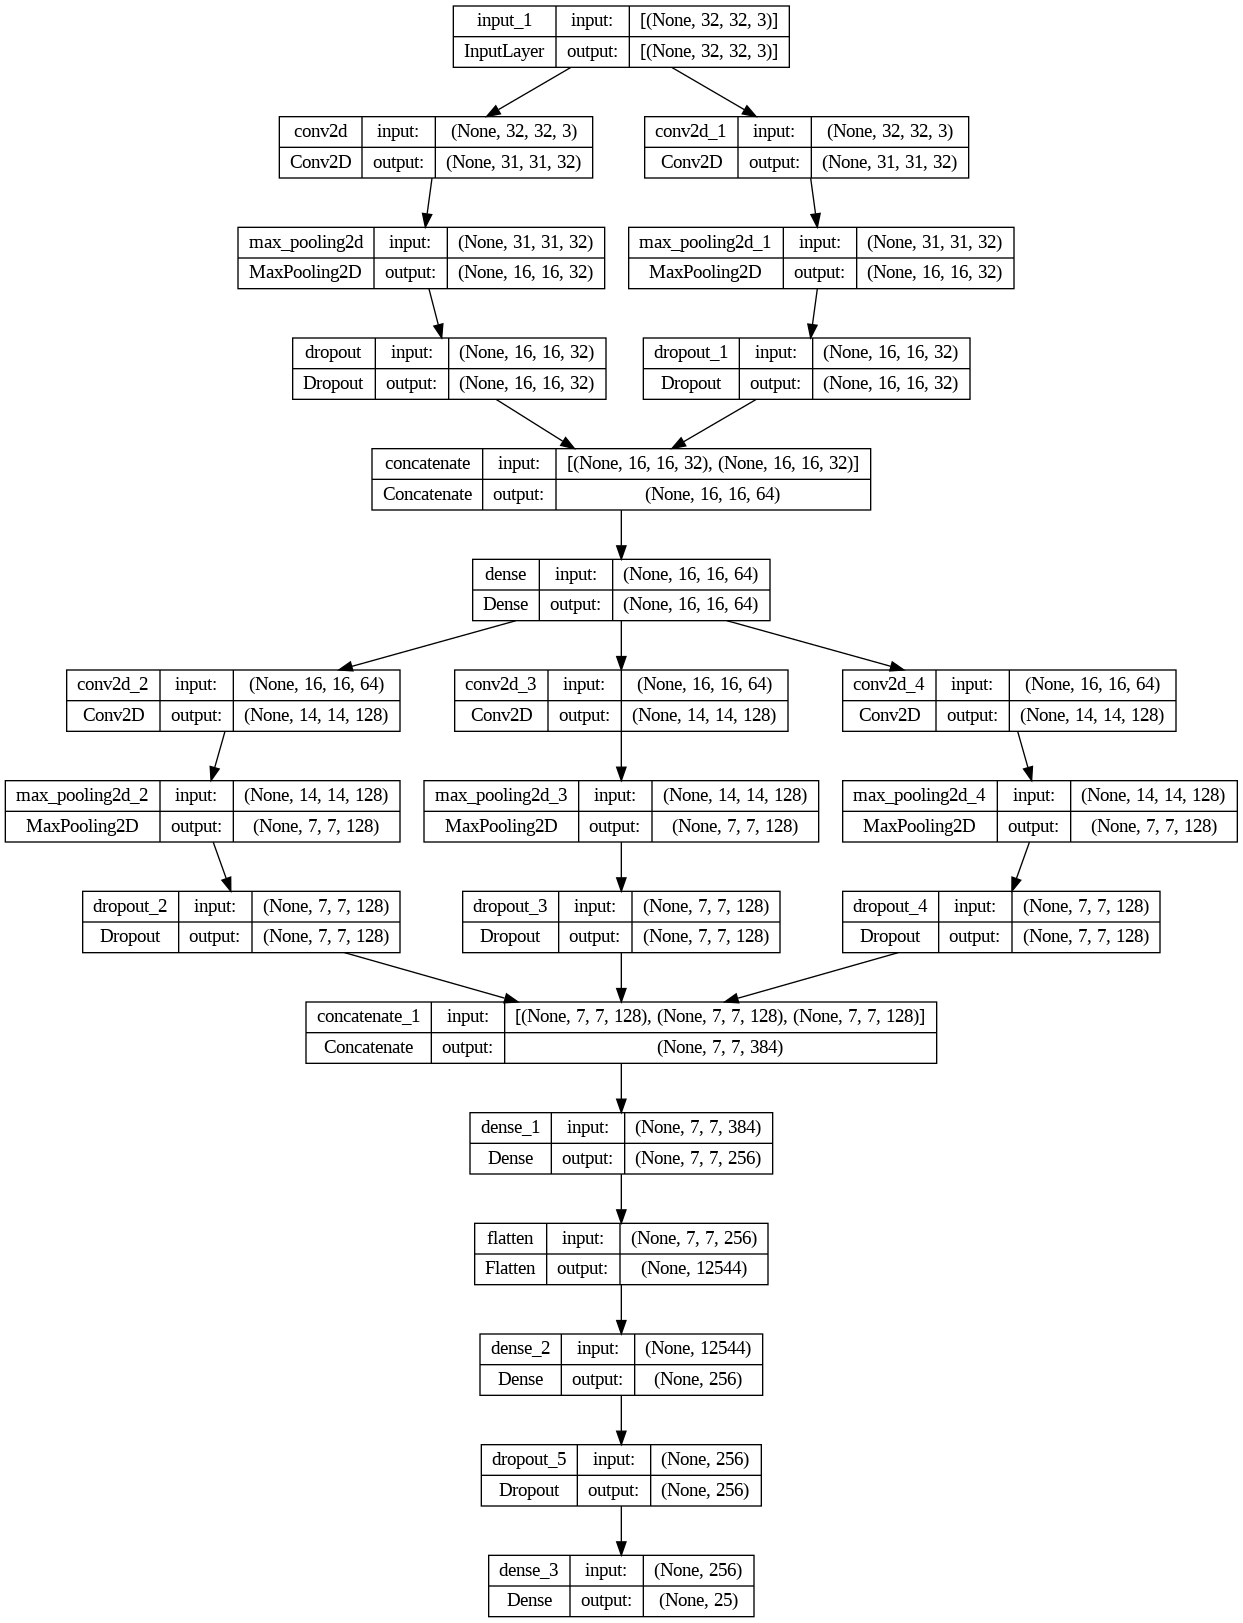

In [65]:
# Show model plot
keras.utils.plot_model(func_model,show_shapes=True)

### Transfer Learning

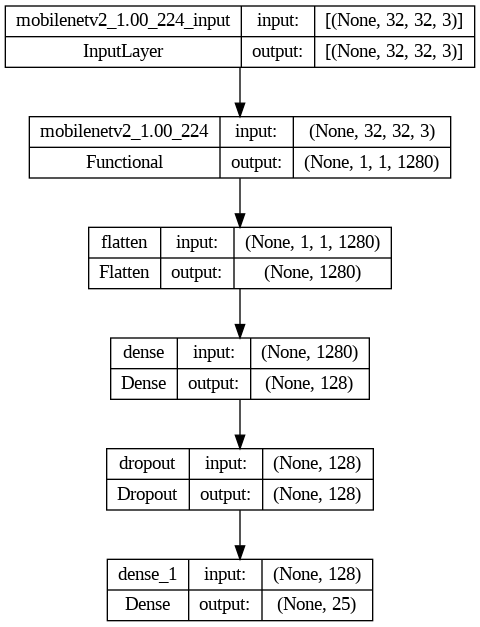

In [66]:
# Show model plot
keras.utils.plot_model(trans_model,show_shapes=True)

## Model Training And Evaluation

### Sequential

In [67]:
history = seq_model.fit(X_trainRGB,y_train,epochs=20,validation_data=(X_valRGB,y_val),callbacks=callback[0])

Epoch 1/20
877/877 [==============================] - 7s 5ms/step - loss: 4.6449 - accuracy: 0.0731 - val_loss: 2.8390 - val_accuracy: 0.2153
Epoch 2/20
 27/877 [..............................] - ETA: 3s - loss: 2.8890 - accuracy: 0.1516

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


877/877 [==============================] - 4s 4ms/step - loss: 2.5452 - accuracy: 0.2423 - val_loss: 2.2277 - val_accuracy: 0.4241
Epoch 3/20
877/877 [==============================] - 5s 6ms/step - loss: 1.9957 - accuracy: 0.3869 - val_loss: 1.7313 - val_accuracy: 0.6012
Epoch 4/20
877/877 [==============================] - 4s 4ms/step - loss: 1.6133 - accuracy: 0.4915 - val_loss: 1.3908 - val_accuracy: 0.6891
Epoch 5/20
877/877 [==============================] - 4s 5ms/step - loss: 1.3482 - accuracy: 0.5682 - val_loss: 1.0501 - val_accuracy: 0.7867
Epoch 6/20
877/877 [==============================] - 5s 5ms/step - loss: 1.1037 - accuracy: 0.6369 - val_loss: 0.8950 - val_accuracy: 0.8287
Epoch 7/20
877/877 [==============================] - 4s 5ms/step - loss: 0.9259 - accuracy: 0.6934 - val_loss: 0.8062 - val_accuracy: 0.8322
Epoch 8/20
877/877 [==============================] - 4s 5ms/step - loss: 0.7762 - accuracy: 0.7372 - val_loss: 0.5616 - val_accuracy: 0.9028
Epoch 9/20
877/87

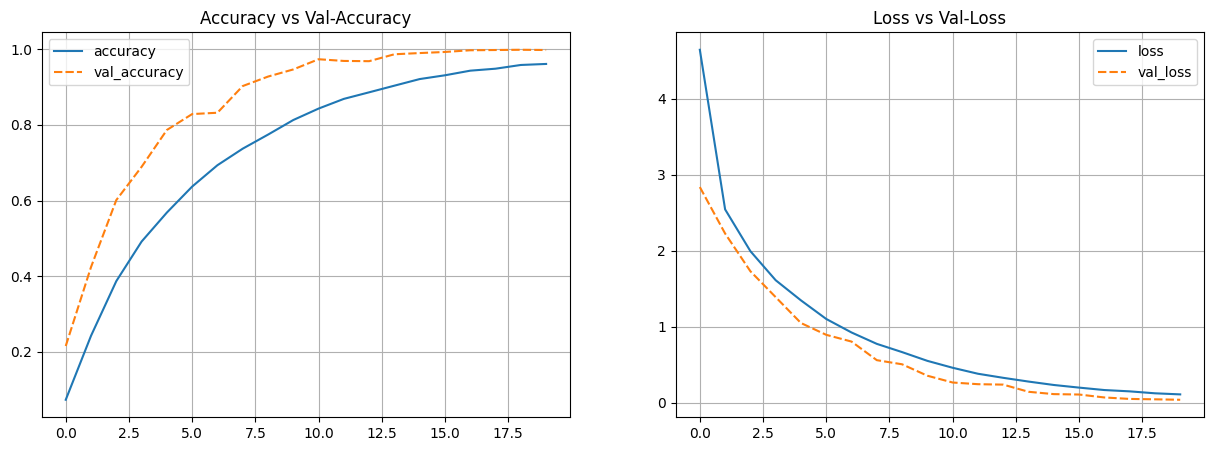

In [68]:
# Plot Training Results

history_model = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Model Sequential menjadi goodfit setelah diimprovement, dengan perbedaan yang tidak terlalu besar di akurasi dan loss pada epoch pertama.

### Functional

In [69]:
history = func_model.fit(X_trainRGB,y_train,epochs=20,validation_data=(X_valRGB,y_val),callbacks=callback[1])

Epoch 1/20
877/877 [==============================] - 11s 10ms/step - loss: 3.9563 - accuracy: 0.0956 - val_loss: 2.4752 - val_accuracy: 0.2685
Epoch 2/20
  7/877 [..............................] - ETA: 7s - loss: 2.5193 - accuracy: 0.1875 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


877/877 [==============================] - 8s 10ms/step - loss: 1.7909 - accuracy: 0.4328 - val_loss: 0.8847 - val_accuracy: 0.7838
Epoch 3/20
877/877 [==============================] - 8s 10ms/step - loss: 0.5798 - accuracy: 0.8064 - val_loss: 0.1209 - val_accuracy: 0.9731
Epoch 4/20
877/877 [==============================] - 9s 10ms/step - loss: 0.2075 - accuracy: 0.9273 - val_loss: 0.0237 - val_accuracy: 0.9945
Epoch 5/20
877/877 [==============================] - 8s 9ms/step - loss: 0.0983 - accuracy: 0.9661 - val_loss: 0.0201 - val_accuracy: 0.9955
Epoch 6/20
877/877 [==============================] - 9s 10ms/step - loss: 0.0617 - accuracy: 0.9787 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 7/20
877/877 [==============================] - 8s 9ms/step - loss: 0.0431 - accuracy: 0.9846 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 8/20
877/877 [==============================] - 9s 10ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 9/20
8

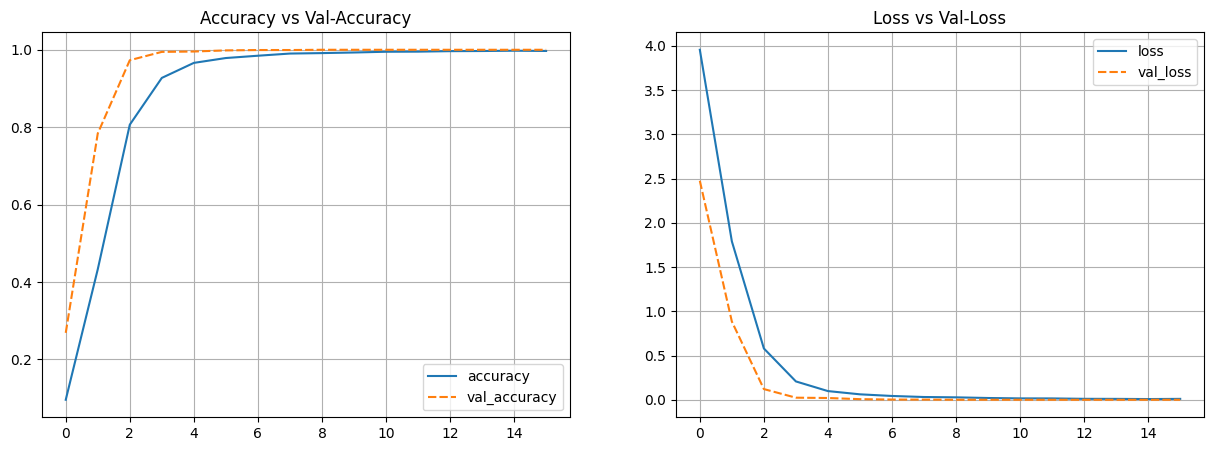

In [70]:
# Plot Training Results

history_model = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Model Functional menjadi goodfit setelah diimprovement, dengan perbedaan yang tidak terlalu besar di akurasi dan loss pada epoch pertama.

### Transfer Learning

In [71]:
history = trans_model.fit(X_trainRGB,y_train,epochs=20,validation_data=(X_valRGB,y_val),callbacks=callback[2])

Epoch 1/20
875/877 [============================>.] - ETA: 0s - loss: 0.9976 - accuracy: 0.7038

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


877/877 [==============================] - 44s 29ms/step - loss: 0.9967 - accuracy: 0.7040 - val_loss: 3.7806 - val_accuracy: 0.1444
Epoch 2/20
877/877 [==============================] - 23s 26ms/step - loss: 0.1738 - accuracy: 0.9459 - val_loss: 1.1982 - val_accuracy: 0.6416
Epoch 3/20
877/877 [==============================] - 24s 27ms/step - loss: 0.1039 - accuracy: 0.9675 - val_loss: 0.3700 - val_accuracy: 0.9394
Epoch 4/20
877/877 [==============================] - 24s 28ms/step - loss: 0.0725 - accuracy: 0.9787 - val_loss: 0.1436 - val_accuracy: 0.9795
Epoch 5/20
877/877 [==============================] - 23s 27ms/step - loss: 0.0461 - accuracy: 0.9869 - val_loss: 0.0634 - val_accuracy: 0.9868
Epoch 6/20
877/877 [==============================] - 24s 28ms/step - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.0260 - val_accuracy: 0.9897
Epoch 7/20
877/877 [==============================] - 24s 28ms/step - loss: 0.0325 - accuracy: 0.9922 - val_loss: 0.0043 - val_accuracy: 0.9994
Epo

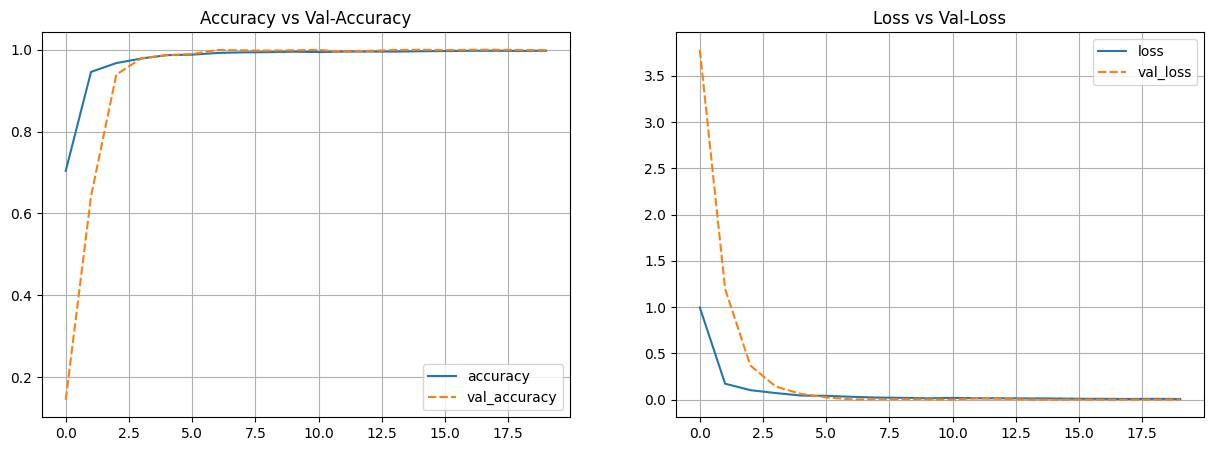

In [72]:
# Plot Training Results

history_model = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Model Transfer Learning tetap overfit setelah diimprovement, dengan perbedaan yang terlalu besar di akurasi dan loss pada epoch pertama.

# Model Evaluation

In [102]:
model_chk = {}
for filename in os.listdir(os.getcwd()):
  if 'hdf5' in filename:
    model_chk[filename.replace('.hdf5','')] = keras.models.load_model(filename)

In [103]:
model_chk

{'func_model': <keras.src.engine.functional.Functional at 0x7ff067f6c5b0>,
 'trans_modelv2': <keras.src.engine.sequential.Sequential at 0x7ff067f6f430>,
 'trans_model': <keras.src.engine.sequential.Sequential at 0x7ff068330100>,
 'seq_model': <keras.src.engine.sequential.Sequential at 0x7ff036e27f70>,
 'func_modelv2': <keras.src.engine.functional.Functional at 0x7feff5a83730>,
 'seq_modelv2': <keras.src.engine.sequential.Sequential at 0x7feff51eb3a0>}

### Perbandingan Akurasi

In [105]:
test_data = RGB(X_test)

index = []
res = {'loss':[],
       'accuracy':[]}

for key,modeling in model_chk.items():
  print(key)
  loss, accuracy = modeling.evaluate(test_data,y_test)
  res['loss'].append(loss)
  res['accuracy'].append(accuracy)
  index.append(key)

pd.DataFrame(res,index=index)

func_model
109/109 [==============================] - 1s 6ms/step - loss: 7.9732e-07 - accuracy: 1.0000
trans_modelv2
109/109 [==============================] - 1s 7ms/step - loss: 2.0265e-04 - accuracy: 1.0000
trans_model
109/109 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 0.9994
seq_model
109/109 [==============================] - 0s 2ms/step - loss: 1.1400e-05 - accuracy: 1.0000
func_modelv2
109/109 [==============================] - 0s 4ms/step - loss: 1.6777e-05 - accuracy: 1.0000
seq_modelv2
109/109 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9997


,loss,accuracy
func_model,7.973159e-07,1.000000
trans_modelv2,2.026458e-04,1.000000
trans_model,1.435359e-03,0.999422
seq_model,1.140012e-05,1.000000
func_modelv2,1.677653e-05,1.000000
seq_modelv2,3.651893e-02,0.999711


Semuanya kecuali trans_model dan seq_modelv2 memiliki akurasi yang tinggi.

### Kesimpulan Model Evaluation

Model Sequential yang telah di improve\(seq_modelv2\) adalah model yang terbaik, dikarenakan di yang lebih cepat dan perbandingan akurasi dan loss pada epoch pertama yang tidak terlalu tinggi membuat model ini bagus untuk digunakan.